In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("kaggle_movie_train.csv")

In [5]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [6]:
df.shape

(22579, 3)

In [7]:
df.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

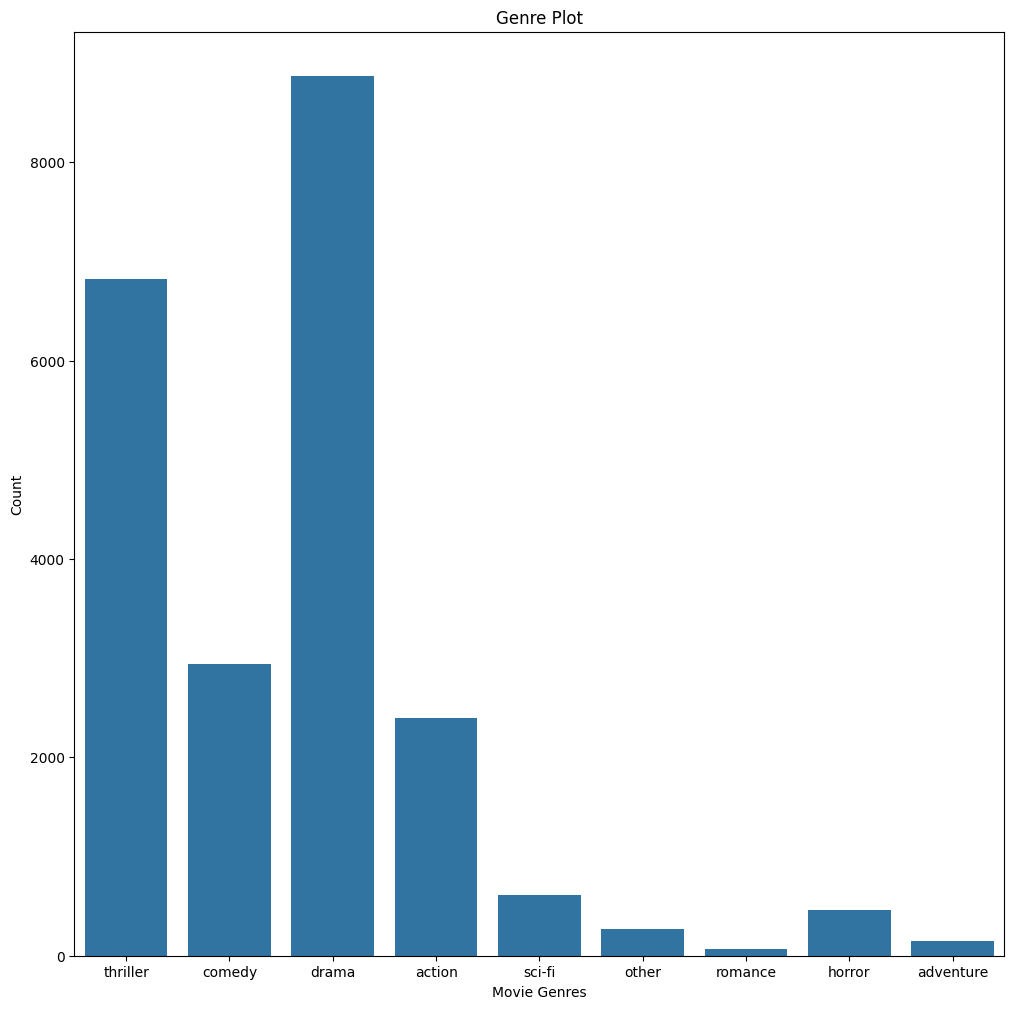

In [9]:
# Visualizing the count of 'genre' column from the dataset
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

In [10]:
# Finding unique genres
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [11]:
# Mapping the genres to values
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [12]:
# Finding any NaN values
df.isna().any()

,0
id,False
text,False
genre,False


In [13]:
df.drop('id', axis=1, inplace=True)
df.columns

Index(['text', 'genre'], dtype='object')

In [14]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
df.shape

(22579, 2)

In [16]:
# Cleaning the text
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):

  # Cleaning special character from the dialog/script
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])

  # Converting the entire dialog/script into lower case
  dialog = dialog.lower()

  # Tokenizing the dialog/script by words
  words = dialog.split()

  # Removing the stop words
  dialog_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in dialog_words]

  # Joining the stemmed words
  dialog = ' '.join(words)

  # Creating a corpus
  corpus.append(dialog)

In [17]:
corpus[0:10]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [18]:
df[df['genre'] == 4].index

Index([    2,     4,     7,    10,    11,    12,    13,    14,    15,    16,
       ...
       22553, 22560, 22561, 22563, 22564, 22567, 22568, 22571, 22574, 22575],
      dtype='int64', length=8873)

In [19]:
len(corpus)

22579

In [20]:
drama_words = []
for i in list(df[df['genre']==4].index):
  drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
  action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
  comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 3):
  drama += drama_words[i]
  action += action_words[i]
  comedy += comedy_words[i]

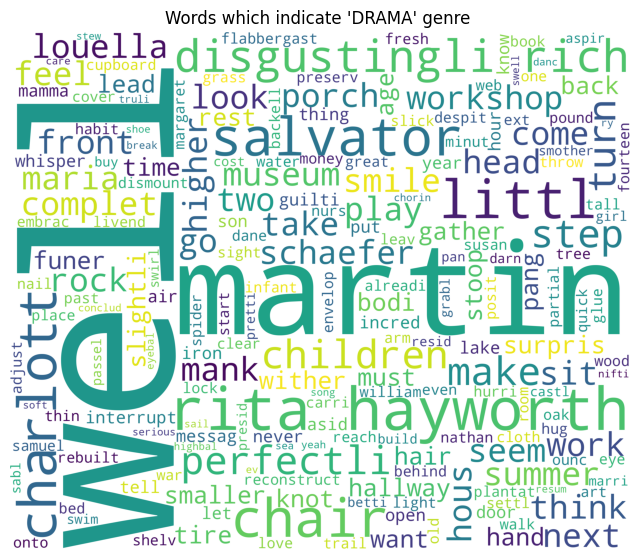

In [22]:
# Creating wordcloud for drama genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

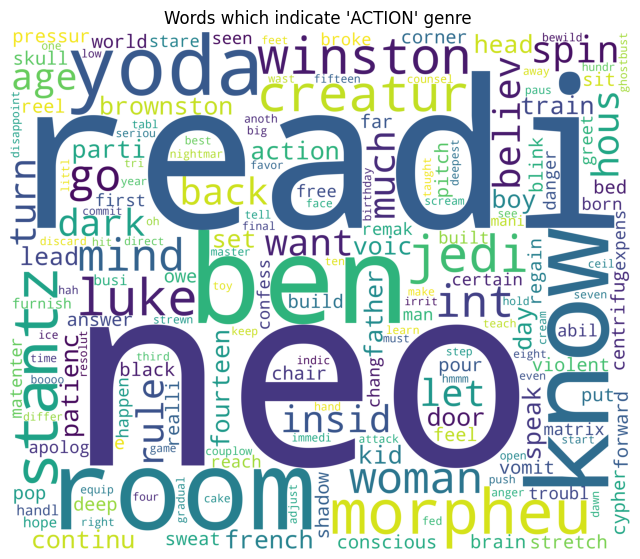

In [23]:
# Creating wordcloud for action genre
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()

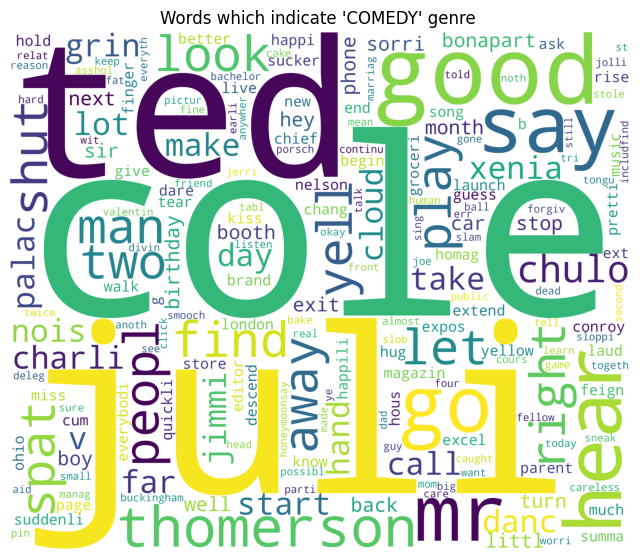

In [24]:
# Creating wordcloud for comedy genre
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre ")
plt.show()

In [25]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [26]:
y = df['genre'].values

#### Model Building

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


Multinomial Naive Bayes

In [29]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [30]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [31]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 89.57%


In [32]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [33]:
nb_cm

array([[  62,    1,    0,    0,    1,    2,    0,    0,    0],
       [   0,  450,    0,    8,    6,    1,    0,    0,   11],
       [   0,    2,   41,    0,    1,    0,    0,    0,    1],
       [   0,    7,    0,  517,   18,    2,    0,    4,   11],
       [   3,   42,    1,   38, 1607,   21,    1,   11,  103],
       [   0,    1,    0,    1,    4,   73,    0,    0,    3],
       [   0,    1,    0,    0,    0,    0,   10,    0,    0],
       [   0,    2,    0,    2,    7,    1,    0,  112,    8],
       [   0,   14,    0,   21,   77,   11,    0,   22, 1173]])

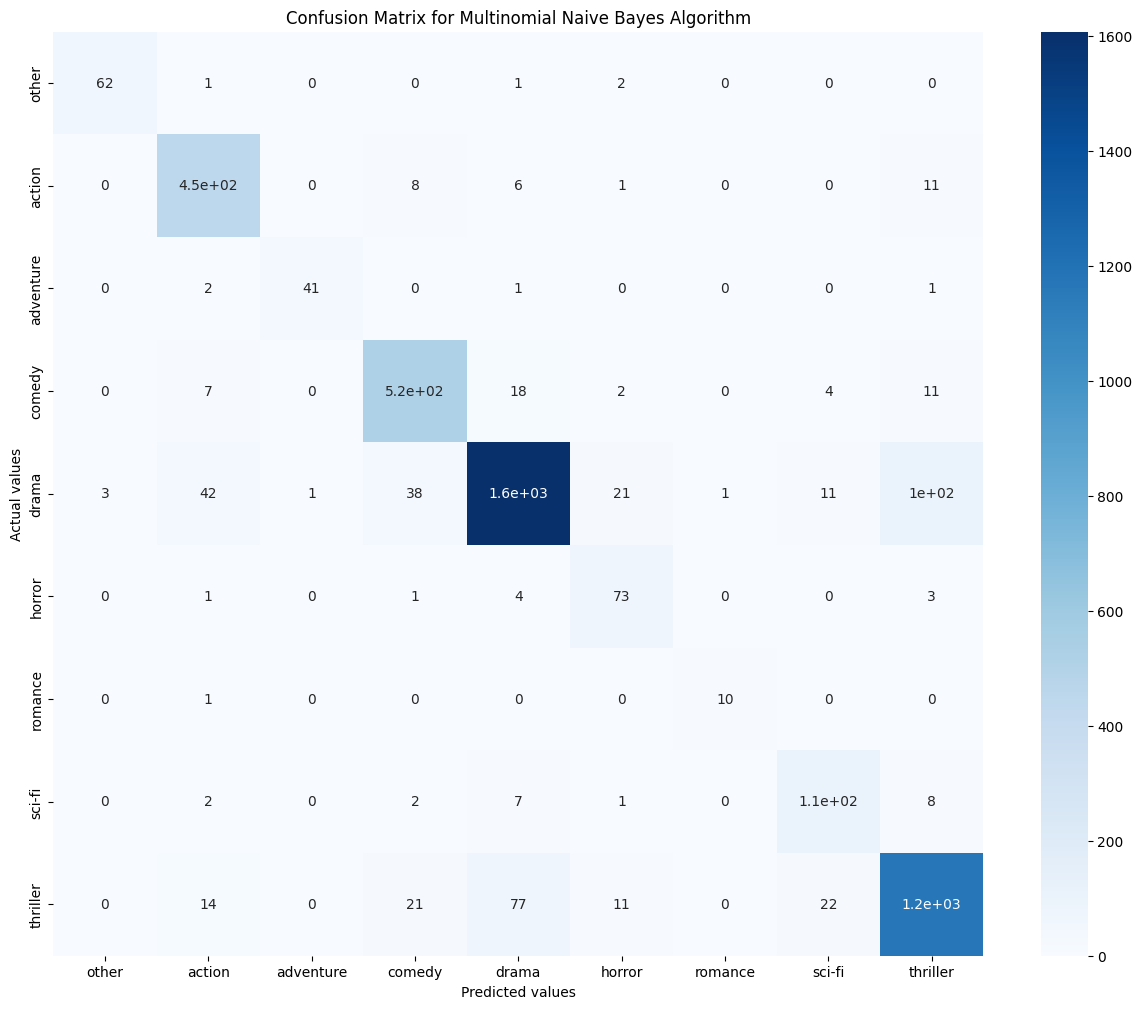

In [34]:
# Plotting the confusion matrix
plt.figure(figsize=(15,12))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [35]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 91.34%
Accuracy score for alpha=0.2 is: 91.08%
Accuracy score for alpha=0.3 is: 90.85%
Accuracy score for alpha=0.4 is: 90.59%
Accuracy score for alpha=0.5 is: 90.26%
Accuracy score for alpha=0.6 is: 90.12%
Accuracy score for alpha=0.7 is: 90.04%
Accuracy score for alpha=0.8 is: 89.95%
Accuracy score for alpha=0.9 is: 89.79%
Accuracy score for alpha=1.0 is: 89.57%
--------------------------------------------
The best accuracy is 91.34% with alpha value as 0.1


In [36]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

### Predictions

In [37]:
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)

  temp = cv.transform([final_script]).toarray()
  return classifier.predict(temp)[0]

In [38]:
from random import randint

In [40]:
test = pd.read_csv("kaggle_movie_test.csv")
test.columns

Index(['id', 'text'], dtype='object')

In [41]:
test.shape

(5589, 2)

In [43]:
test.drop('id', axis = 1, inplace = True)

KeyError: "['id'] not found in axis"

In [44]:
test.head()

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."


In [45]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: 's just finishing a drawing of a leaping jungle cat in black and red ink on Bob's shoulder. Future Man stops and looks at them with no feeling. ANTHONY pause It's a panther. Pause. Future Man looks at Bob. FUTURE MAN How's that 700 bucks coming? BOB I'm working on it. FUTURE MAN Hard to find it sitting by the pool drinking beer and bullshitting. He walks inside. ANTHONY I thought he didn't have to pay anything because of the technicality. BOB Yeah, but he still has the aggravation. Three days sitting in a cell. ANTHONY pause Were you adopted, Bob? BOB Why do you say that? ANTHONY Well, because you guys don't look alike. BOB No. I wasn't adopted. Long pause. ANTHONY Was Future Man adopted? BOB Jesus Christ! No. INT. CAR. DAY Dignan and APPLEJACK are sitting in, a '72 Monte Carlo by the curb two houses down from Bob's. Applejack is a small black man with white hair. It's hard to tell exactly how old he is. Around sixty five. DIGNAN There's a lot of valuable shit in there, Appleja

In [46]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: hat's right... TUMBLER Damn. Damn, damn, damn ... FREB Memphis. Holy shit. It's an honor, man And he pumps his hand... Memphis continues to stare at Kip KIP It's good to see ya, man. You changed your look MEMPHIS You, too Hold the stare... The others are excited... FREB What are you doing back, Memphis? MEMPHIS Little visit. Check on the family. KIP It's nice to see ya, man He smiles ... Memphis eyeballs him... Toby is there ... TOBY Hey, Memphis. Remember me? Toby Walker. I live next door ... MEMPHIS Sure. Hey, Toby. You grew up TOBY Yeah, I'm cool ... And Memphis turns back to Kip, who's picked up a pool cue. KIP Who's got next game ? And he makes to rack 'em up ... Then MIRROR MAN I get it. You ain't gotta be a genius Memphis come back to save our bacon! TUMBLER Shut up, Mirror Man FREB Izzat true? You come back to save our bacon? MIRROR MAN Of course it's true. He come to save his brother's dangling ass KIP That can't be it. Cos we don't need saving FREB We don't ? MEMPHIS 

In [47]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: m not going to walk through that shark arcade. KATHRYN They're not going to hurt you. They're encased in plastic. MIKE I don't want to see them, Kathryn. KATHRYN Michael, I don't have time. Please! It's time you dealt with this and got over it. Now come on! She takes his hand and leads him into the tunnel. 143 SHARK TUNNEL 143 Mike is very apprehensive as the SHARKS encroach upon them from all angles. He can't look at them. KATHRYN Calvin wants me to move the White for tomorrow. MIKE ... He ought to put him in here. KATHRYN It's too soon to move him. MIKE So tell Calvin. KATHRYN I did. He wants it on exhibit. MIKE Well, that's why you got it. They walk on a bit, then Mike leans against the tunnel wall, eyes closed. KATHRYN Mike... you okay? He's taking deep breaths. He's very pale and perspiring. MIKE It's back... She goes to him. KATHRYN What's back? He's fighting some inner demon, and losing. The sharks come swimming by him. He stares them in the eye. There seems to be thousa

In [48]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: nd Billy Boy are drenched. KITTLE Alright... you had your chance, sister. Make room for Kittle... Nena climbs in back. Kittle takes the wheel. ON THE HIGHWAY The Torino spits shoulder gravel, u turning... causing other cars to make drastic moves to avoid. IN THE TORINO Kittle accelerates, shifting gear, focused. KITTLE The time has come... shifts gear ... for asses to be kicked. He shifts again. ENGINE DEAFENING... SPEEDOMETER 65mph... 70mph... 75mph... ON THE HIGHWAY FAR AHEAD the van. Butch Cassidy sticks his head out the window, holds his hat, looking back. BUTCH CASSIDY Fuck me... Indeed. The Torino's far back, but coming on strong. IN THE TORINO KITTLE Firepower, Billy Boy Billy Boy swigs from his flask. He opens a trap door in the seat beside him, reaching back in the trunk to produce a sawed off shotgun, which he hands up to Nena. SPEEDOMETER vibrating at 99mph... 105mph... ON THE HIGHWAY The Torino's getting close to the van, looks like it's gonna pass on the right. The